# Import Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

from sklearn.cluster import KMeans


# Load Dataset

In [2]:
df = pd.read_csv("D:\Study Data\Projects\Datasets\Attack Types Dataset\Dataset\Dataset\Dataset.txt")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.shape

(125973, 43)

In [4]:
df["attack_category"].value_counts()

attack_category
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# EDA (Exploratory data analysis) 

## Remove Duplicate

In [7]:
duplicate = df.duplicated()
print(duplicate.sum())

0


## Remove Null Values

In [8]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Remove outliers

C:\Users\Test User\AppData\Local\Temp\ipykernel_18768\2688123085.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


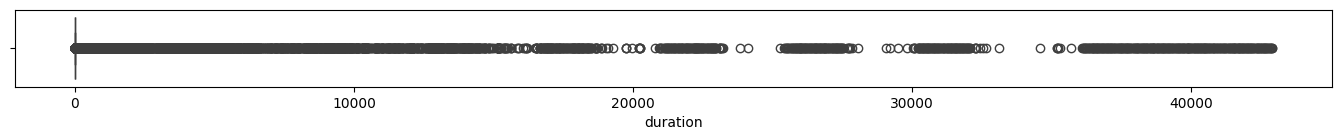

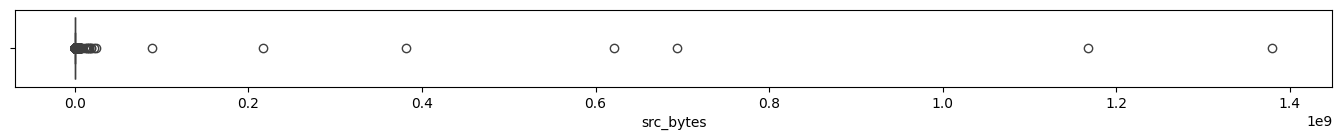

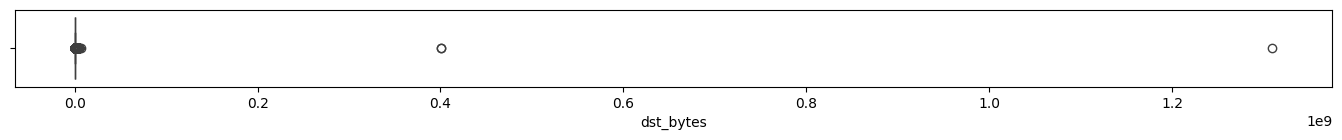

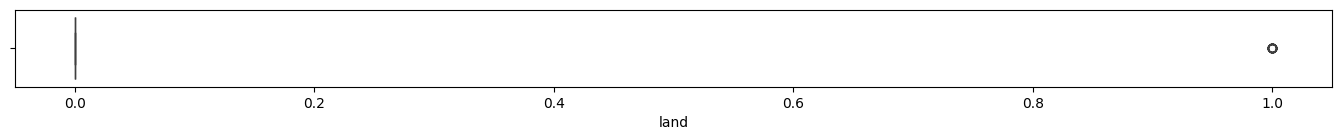

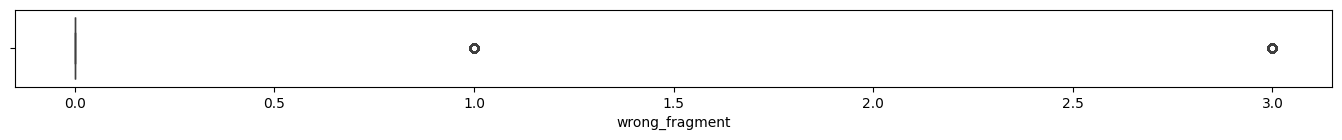

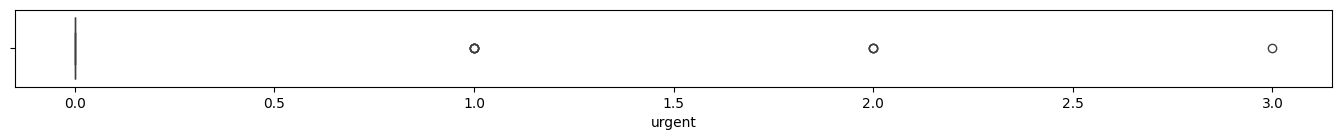

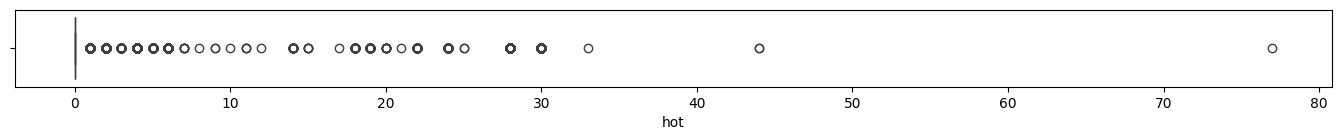

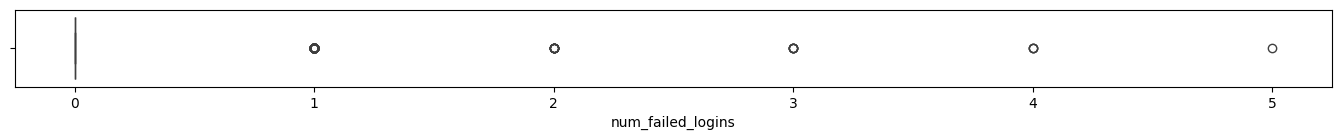

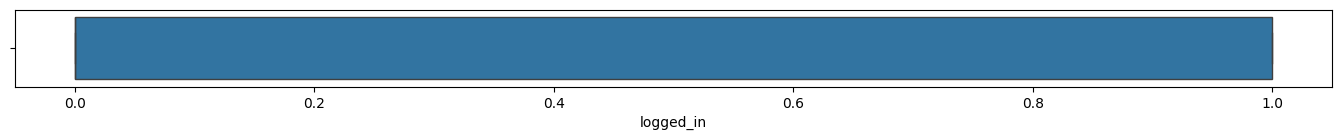

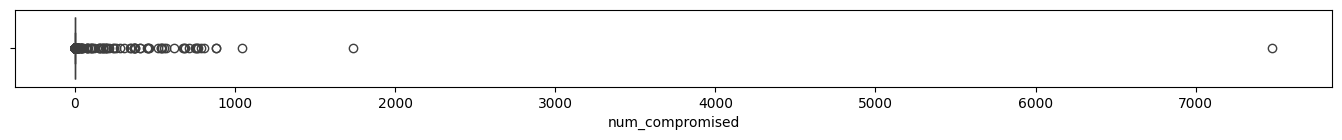

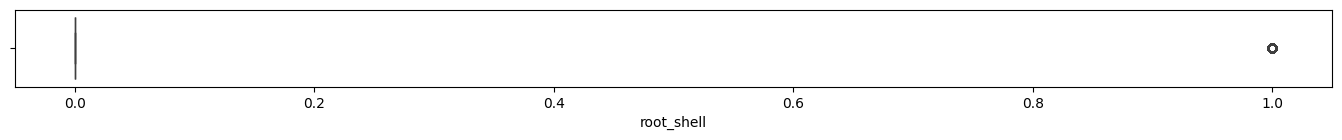

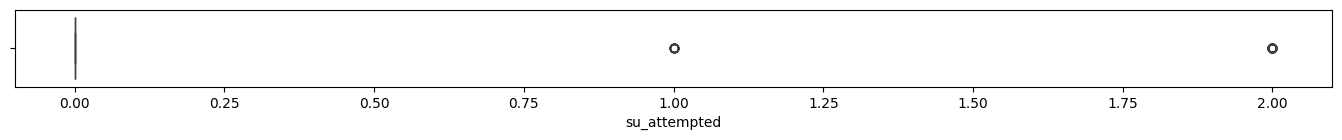

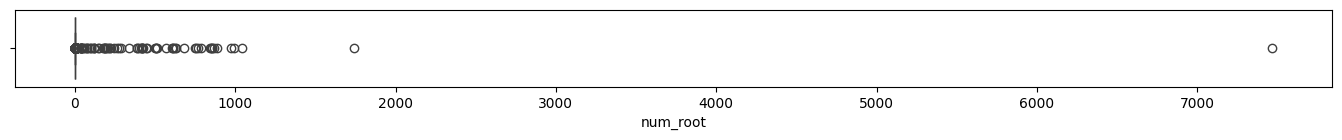

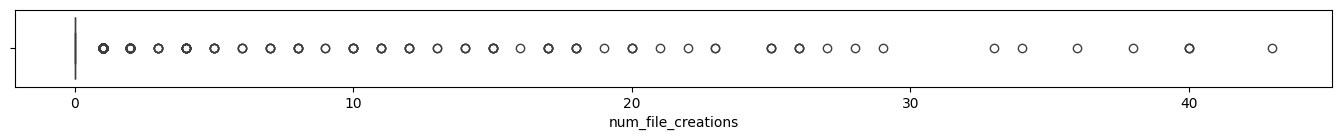

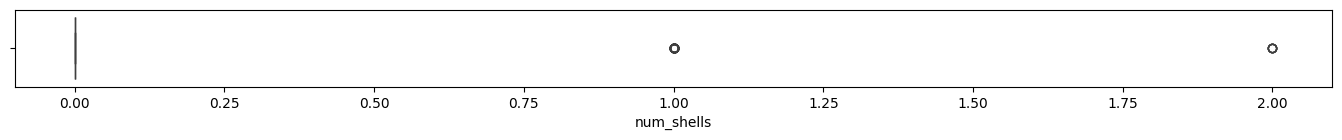

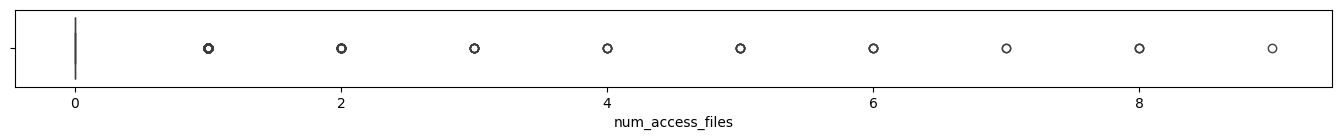

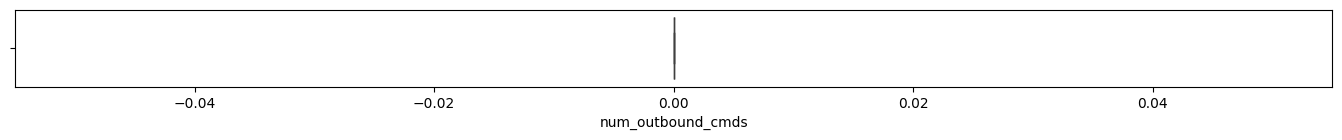

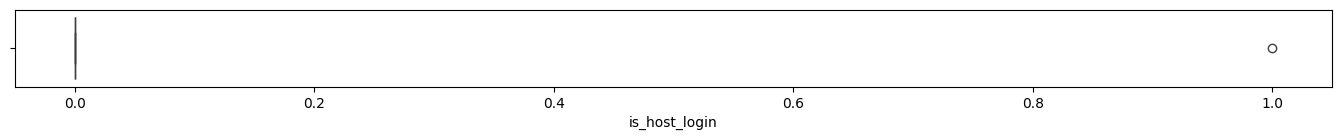

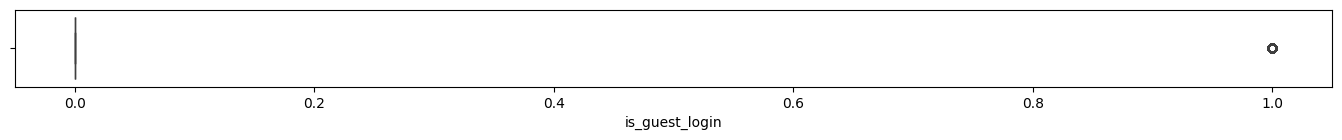

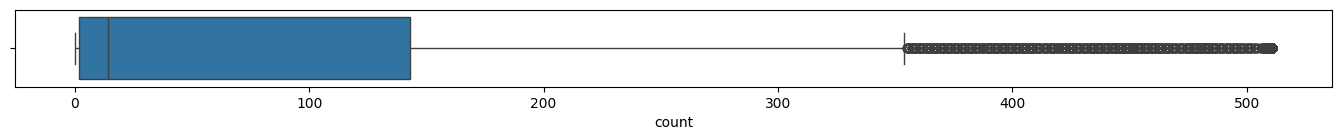

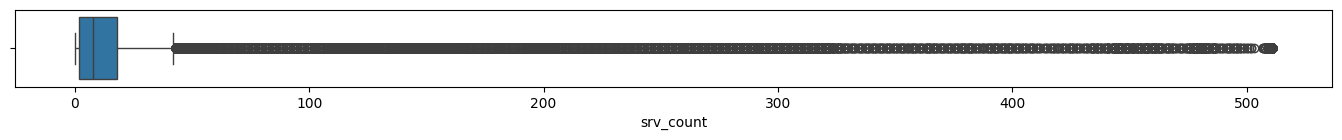

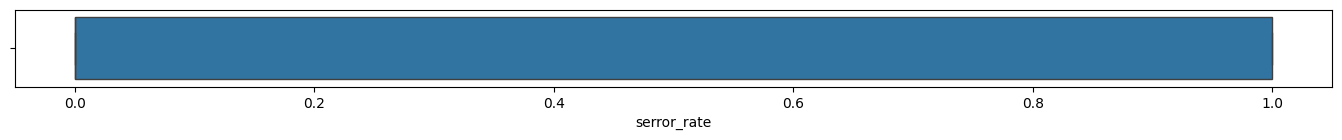

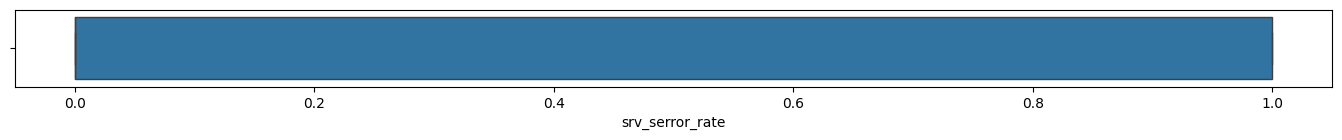

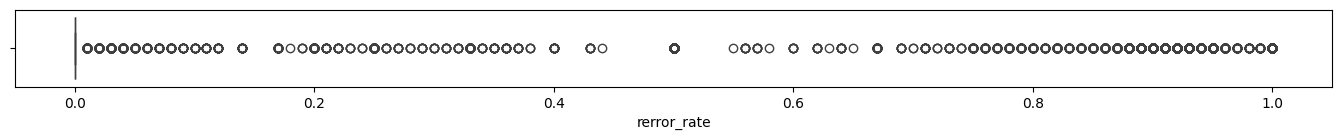

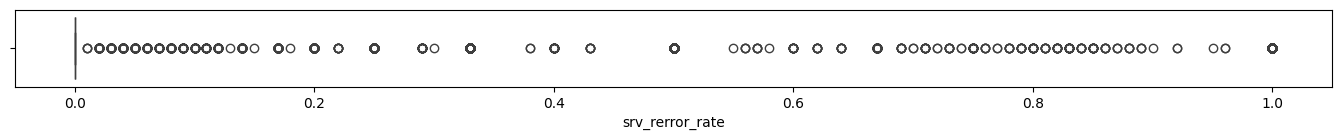

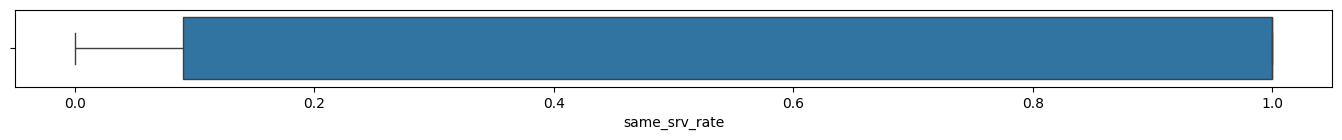

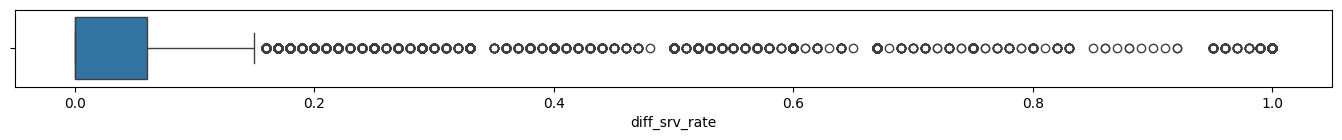

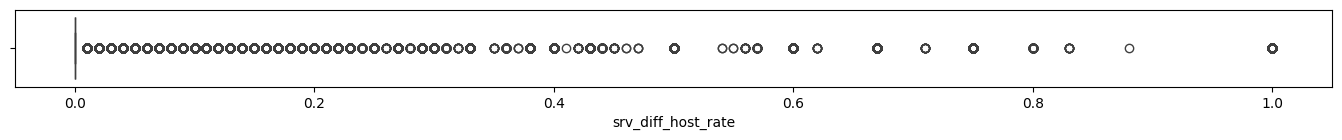

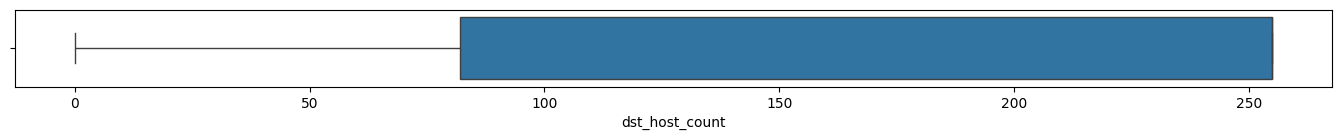

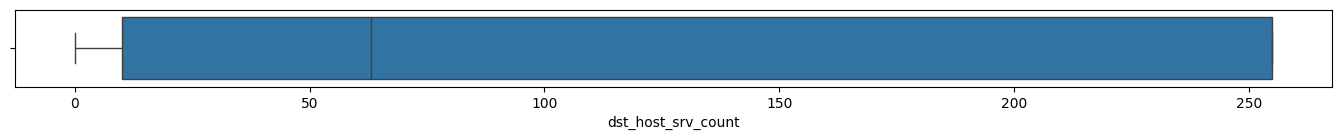

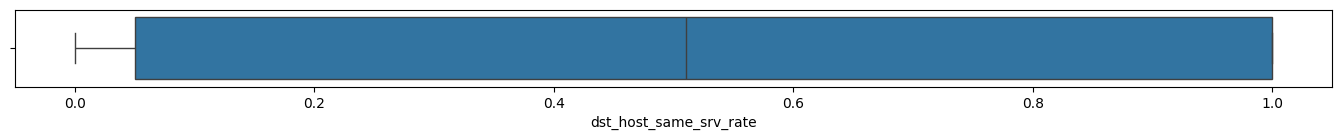

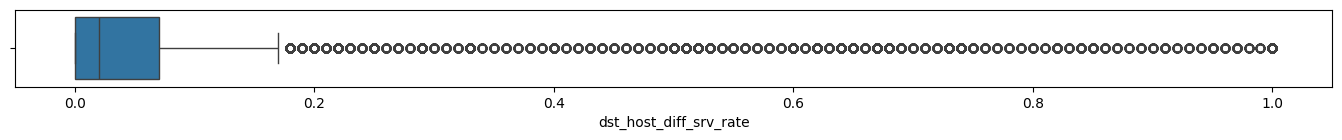

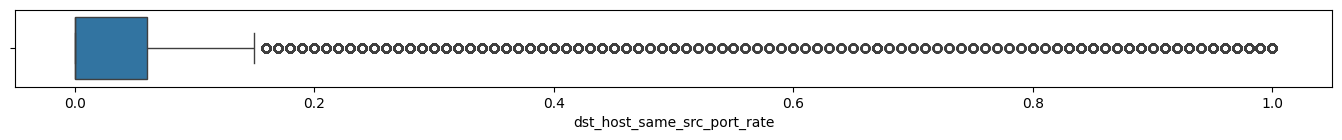

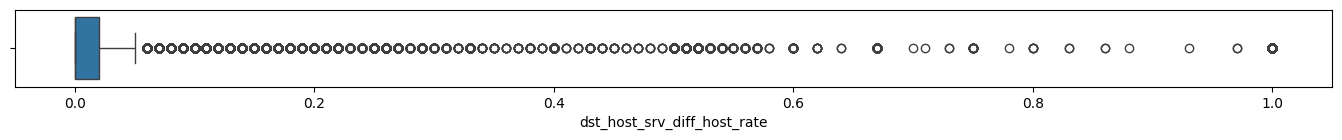

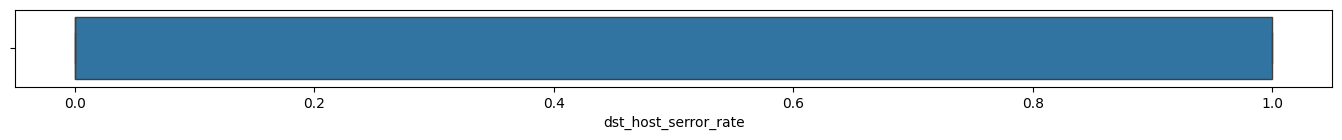

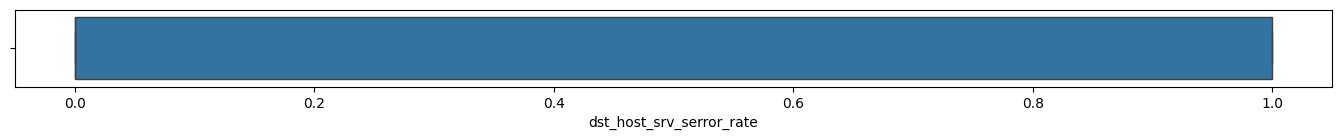

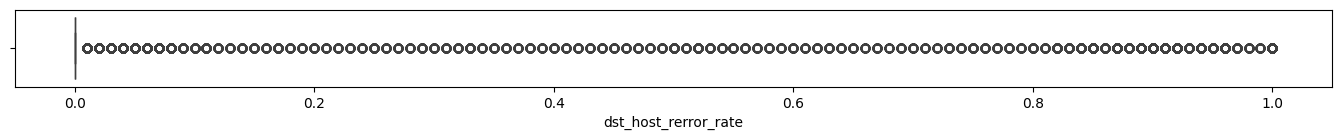

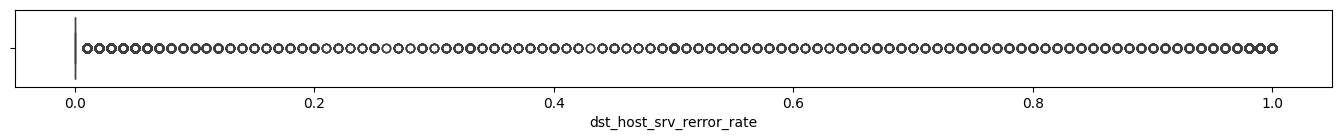

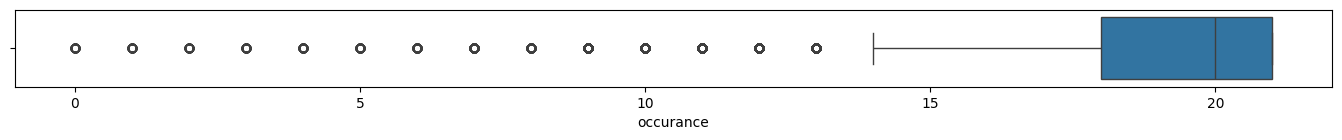

In [9]:
# Outlier Detect in Columns
for column in df:
    if df[column].dtype == "object":
      pass
    else:
      plt.figure(figsize=(17,1))
      sns.boxplot(data=df, x=column)

In [10]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5 * IQR)
  uper_range = Q3+(1.5 * IQR)
  return lower_range,uper_range

In [11]:
#num_cols = df.select_dtypes(include=["int64","float64"])
lst = ['src_bytes', 'dst_bytes', 'logged_in' , 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'occurance']
for i in lst:
    low_range,up_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > up_range,up_range,df[i])
    df[i] = np.where(df[i] < low_range,low_range,df[i])

In [12]:
for i in lst:
    print(i)

src_bytes
dst_bytes
logged_in
count
srv_count
serror_rate
srv_serror_rate
same_srv_rate
diff_srv_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
occurance


C:\Users\Test User\AppData\Local\Temp\ipykernel_18768\1780345034.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


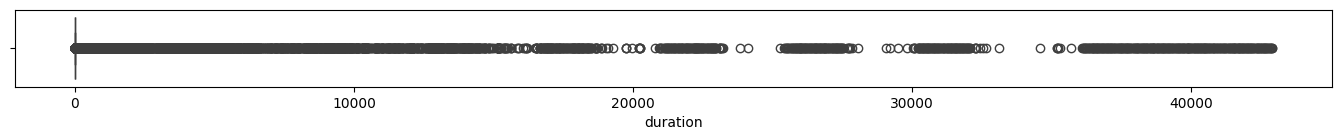

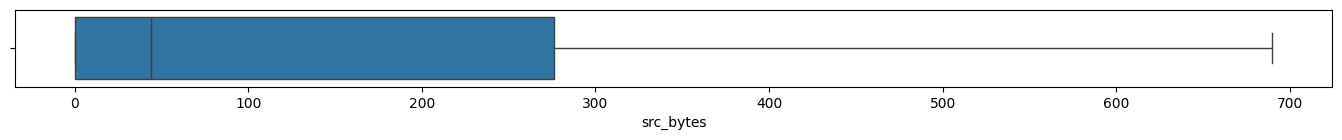

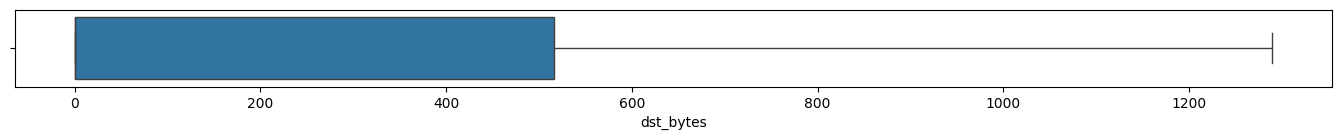

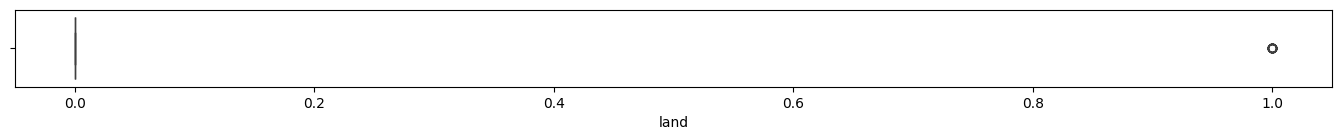

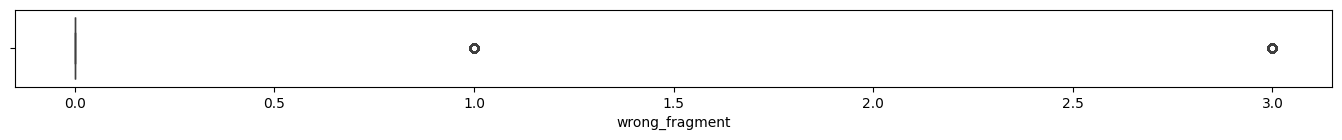

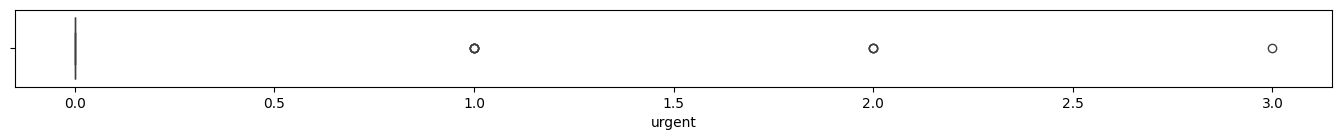

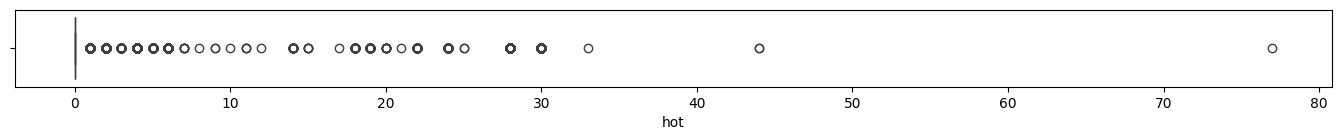

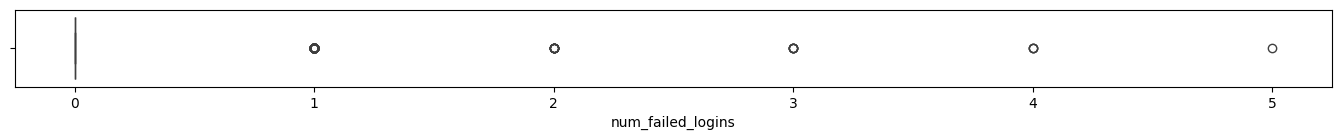

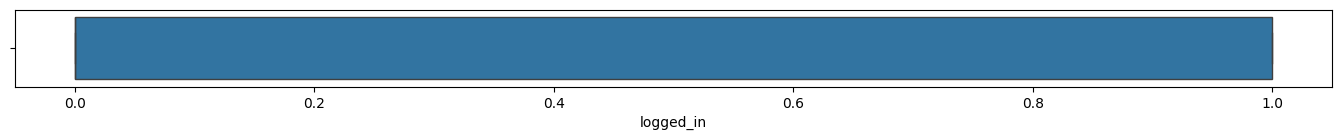

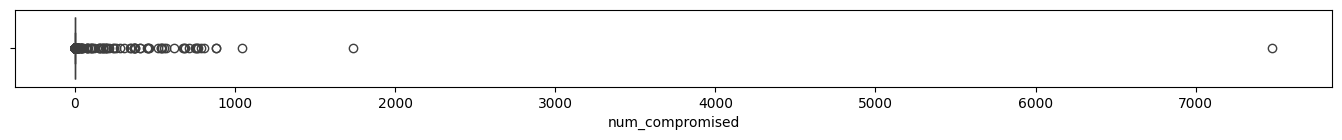

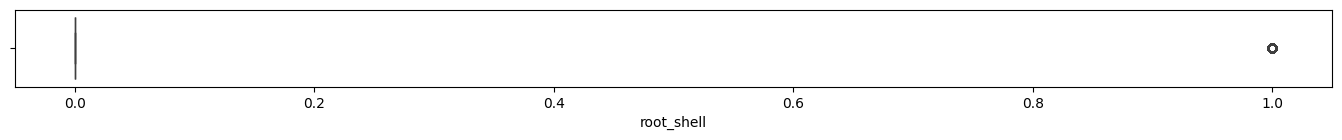

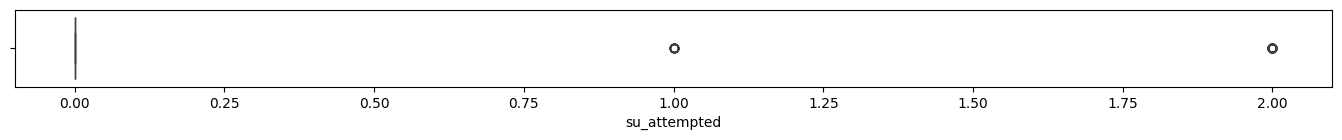

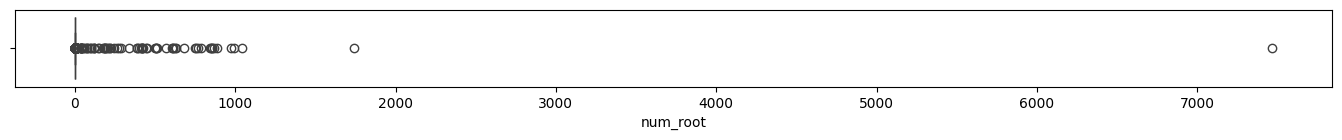

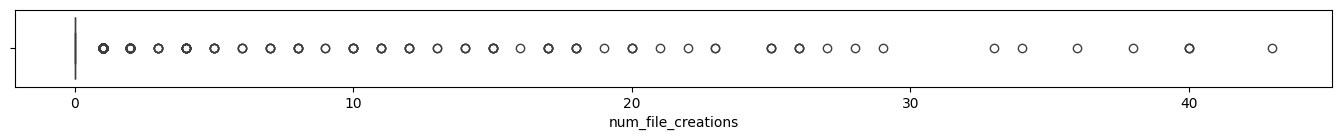

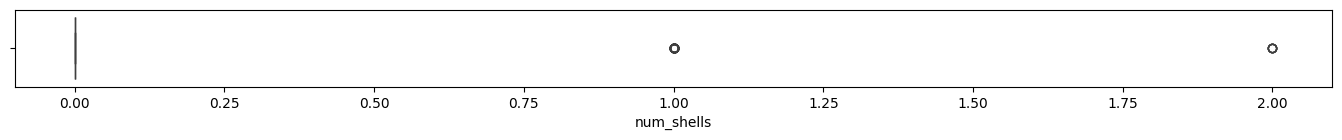

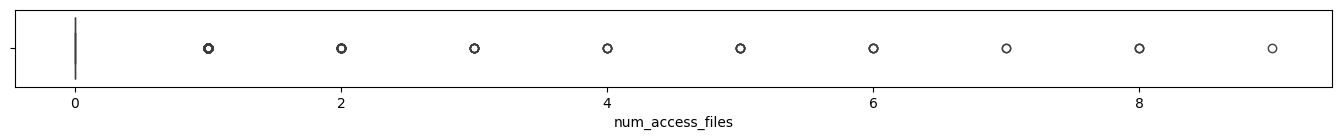

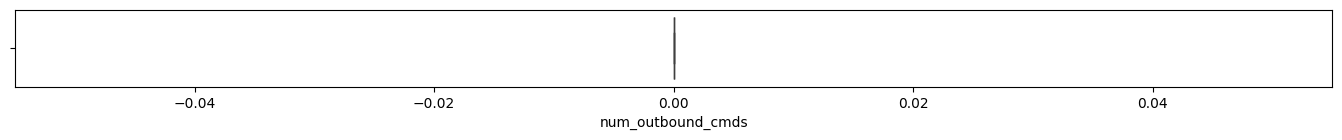

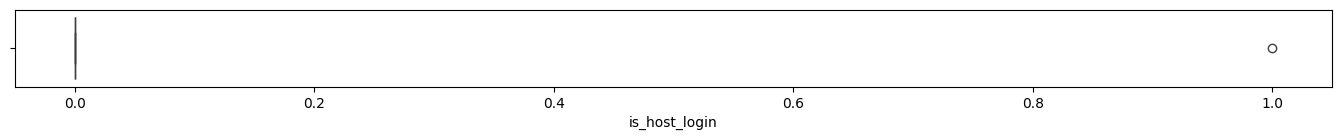

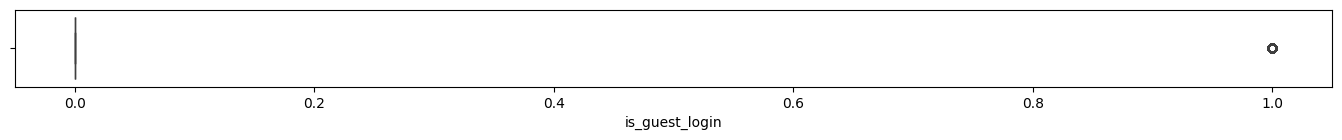

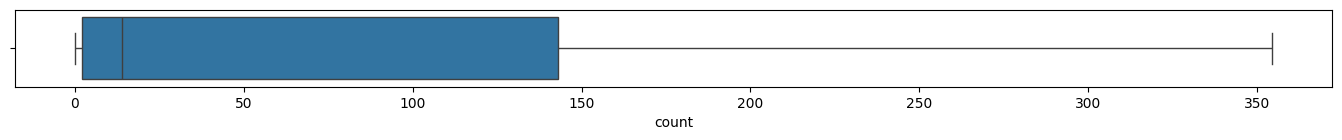

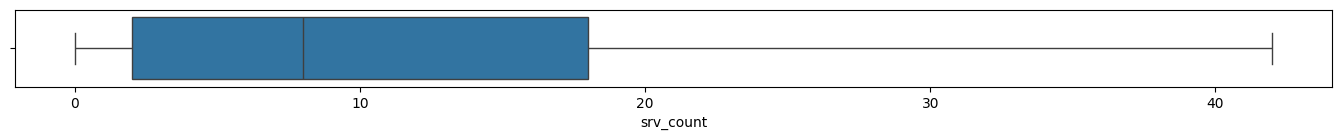

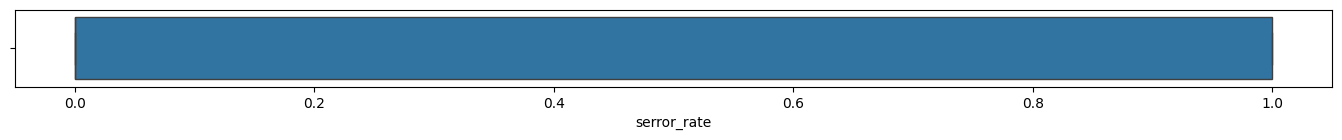

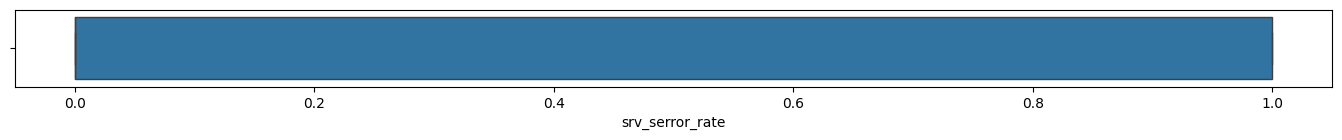

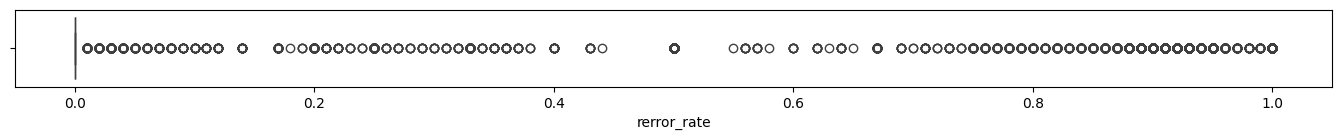

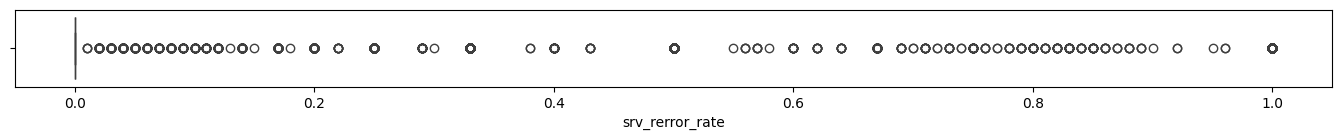

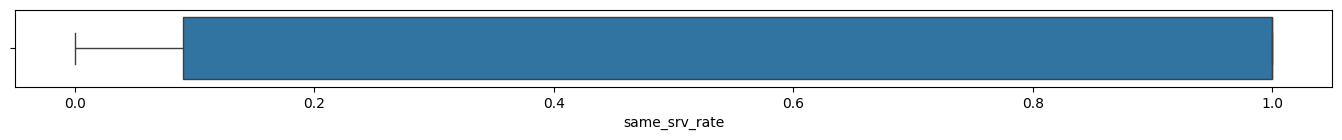

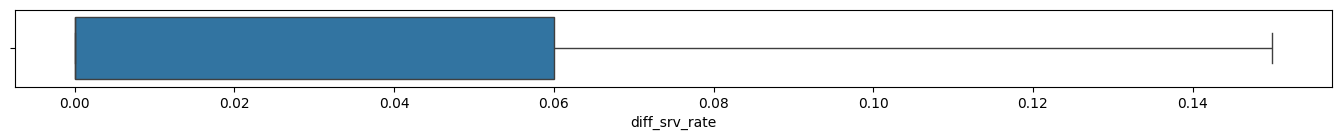

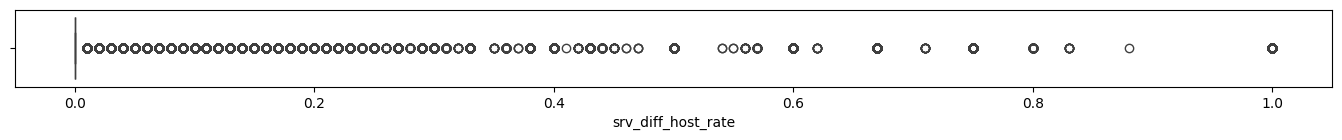

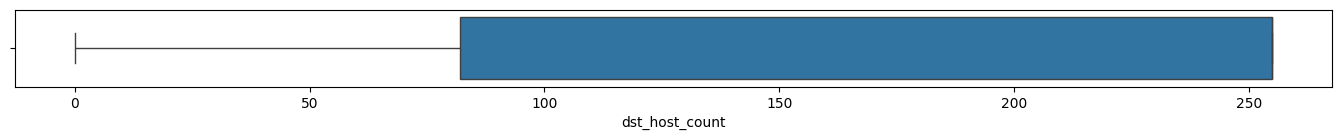

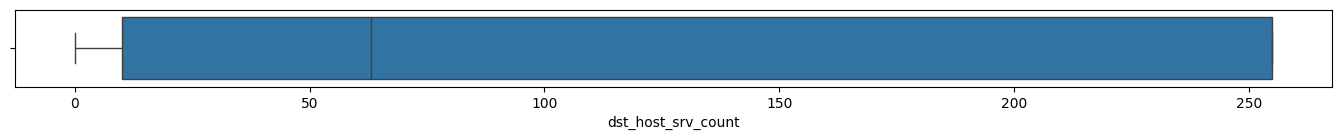

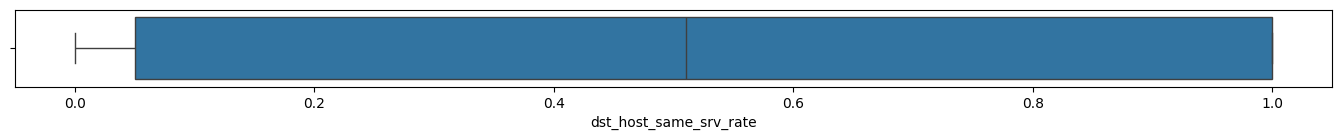

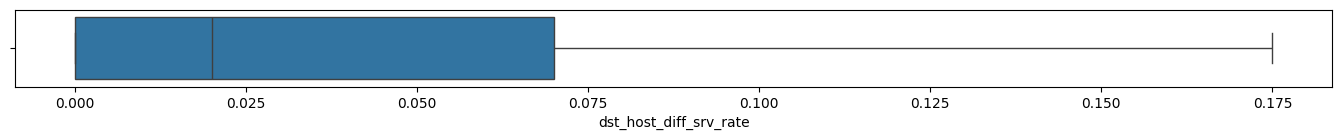

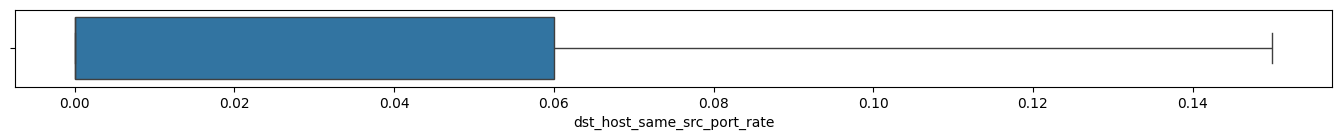

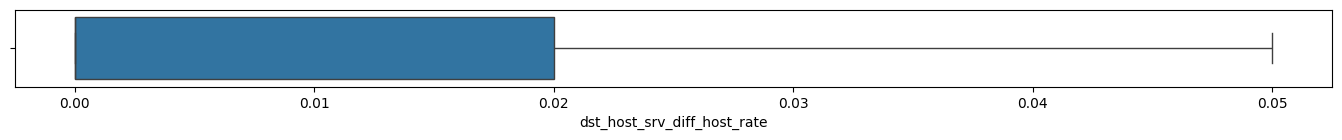

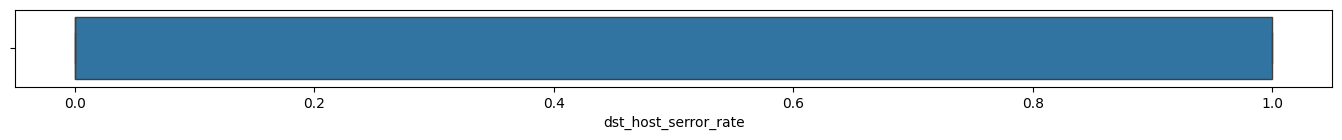

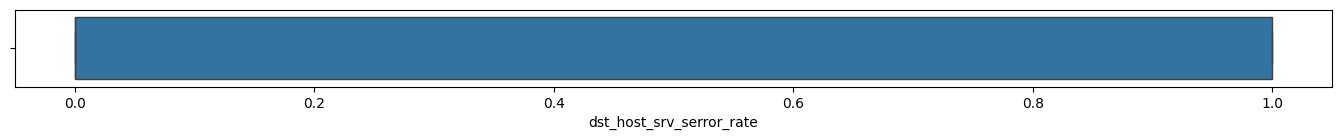

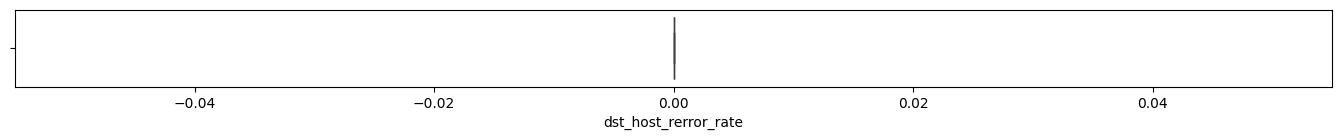

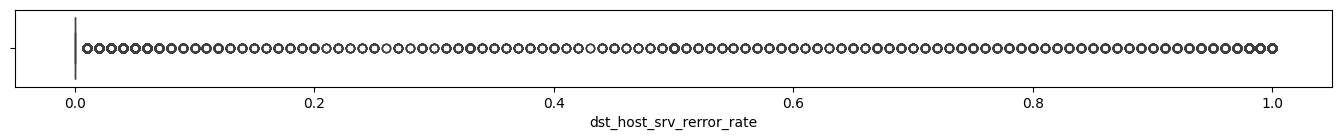

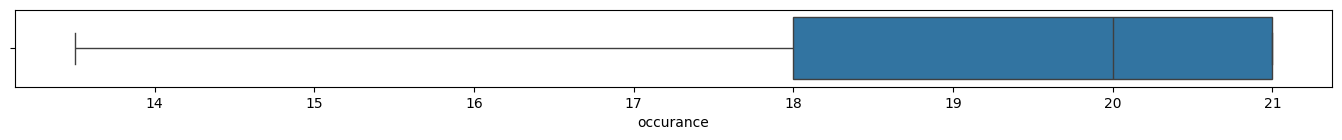

In [13]:
# Outlier Detect in Columns
for column in df:
    if df[column].dtype == "object":
        pass
    else:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

## Convert Attack_category 23 classes to 5 classes

In [14]:
# Dictionaries provided
lst_1 = {'apache2': 'dos', 'back': 'dos', 'mailbomb': 'dos', 'processtable': 'dos', 'snmpgetattack': 'dos', 'teardrop': 'dos',
        'smurf': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos', 'udpstorm': 'dos'}
lst_2 = {'ps': 'u2r', 'buffer_overflow': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r', 'loadmodule': 'u2r',
        'xterm': 'u2r', 'sqlattack': 'u2r', 'httptunnel': 'u2r'}
lst_3 = {'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'snmpguess': 'r2l', 'imap': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l',
        'warezmaster': 'r2l', 'multihop' :'r2l', 'phf': 'r2l', 'imap': 'r2l', 'named': 'r2l', 'sendmail': 'r2l', 'xlock': 'r2l',
        'xsnoop': 'r2l', 'worm': 'r2l'}
lst_4 = {'nmap': 'probe', 'ipsweep': 'probe', 'portsweep': 'probe', 'satan': 'probe', 'mscan': 'probe', 'saint': 'probe', 'worm': 'probe'}

# Function to map attack categories
def map_attack_category(category):
    if category in lst_1:
        return lst_1[category]
    elif category in lst_2:
        return lst_2[category]
    elif category in lst_3:
        return lst_3[category]
    elif category in lst_4:
        return lst_4[category]
    else:
        return category  # Keep the same value if not found in any list

# Apply the mapping function to the attack_category column
df['new_attack_category'] = df['attack_category'].apply(map_attack_category)


In [15]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,new_attack_category
0,0,tcp,ftp_data,SF,491.0,0.0,0,0,0,0,...,0.030,0.15,0.00,0.00,0.00,0.0,0.00,normal,20.0,normal
1,0,udp,other,SF,146.0,0.0,0,0,0,0,...,0.175,0.15,0.00,0.00,0.00,0.0,0.00,normal,15.0,normal
2,0,tcp,private,S0,0.0,0.0,0,0,0,0,...,0.050,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0,dos
3,0,tcp,http,SF,232.0,1290.0,0,0,0,0,...,0.000,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0,normal
4,0,tcp,http,SF,199.0,420.0,0,0,0,0,...,0.000,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0,normal


In [16]:
df["new_attack_category"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

## Convert Categorical values in Numerical

In [17]:
obj_col = df.select_dtypes(include=["object"])
obj_col

,protocol_type,service,flag,attack_category,new_attack_category
0,tcp,ftp_data,SF,normal,normal
1,udp,other,SF,normal,normal
2,tcp,private,S0,neptune,dos
3,tcp,http,SF,normal,normal
4,tcp,http,SF,normal,normal
...,...,...,...,...,...
125968,tcp,private,S0,neptune,dos
125969,udp,private,SF,normal,normal
125970,tcp,smtp,SF,normal,normal
125971,tcp,klogin,S0,neptune,dos


In [18]:
le = LabelEncoder()

for i in obj_col.columns:
    df[i] = le.fit_transform(df[i])

In [19]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,new_attack_category
0,0,1,20,9,491.0,0.0,0,0,0,0,...,0.030,0.15,0.00,0.00,0.00,0.0,0.00,11,20.0,1
1,0,2,44,9,146.0,0.0,0,0,0,0,...,0.175,0.15,0.00,0.00,0.00,0.0,0.00,11,15.0,1
2,0,1,49,5,0.0,0.0,0,0,0,0,...,0.050,0.00,0.00,1.00,1.00,0.0,0.00,9,19.0,0
3,0,1,24,9,232.0,1290.0,0,0,0,0,...,0.000,0.03,0.04,0.03,0.01,0.0,0.01,11,21.0,1
4,0,1,24,9,199.0,420.0,0,0,0,0,...,0.000,0.00,0.00,0.00,0.00,0.0,0.00,11,21.0,1


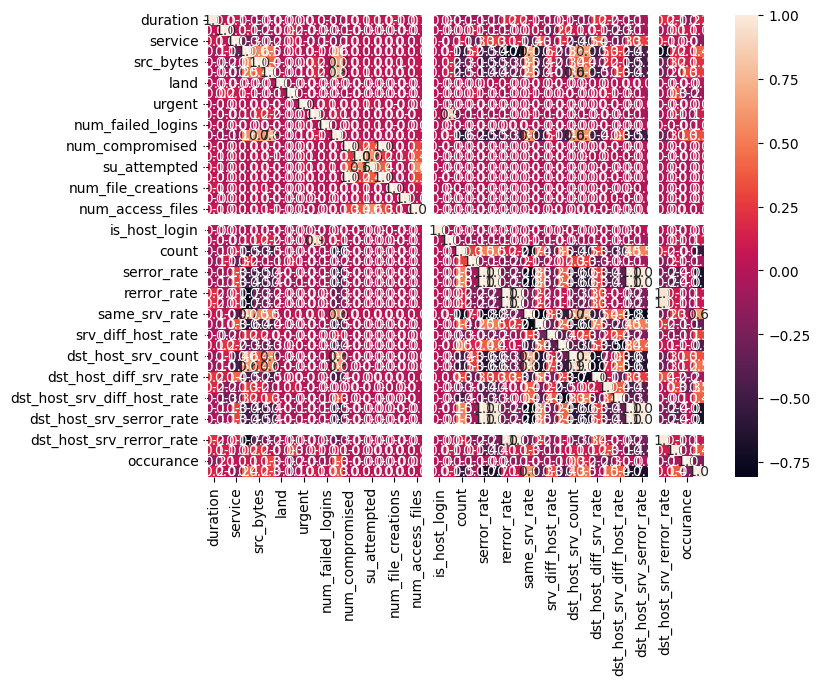

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, fmt=".1f")
plt.show()

# Feature Engineering

## Split Data into Train and Test

In [21]:
df.shape

(125973, 44)

In [22]:
Y = df.pop("new_attack_category")
X = df.iloc[:,:43]

In [23]:
Y

0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: new_attack_category, Length: 125973, dtype: int32

In [24]:
X.drop(["attack_category"], axis=1, inplace=True)

In [25]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
0,0,1,20,9,491.0,0.0,0,0,0,0,...,25.0,0.17,0.030,0.15,0.00,0.00,0.00,0.0,0.00,20.0
1,0,2,44,9,146.0,0.0,0,0,0,0,...,1.0,0.00,0.175,0.15,0.00,0.00,0.00,0.0,0.00,15.0
2,0,1,49,5,0.0,0.0,0,0,0,0,...,26.0,0.10,0.050,0.00,0.00,1.00,1.00,0.0,0.00,19.0
3,0,1,24,9,232.0,1290.0,0,0,0,0,...,255.0,1.00,0.000,0.03,0.04,0.03,0.01,0.0,0.01,21.0
4,0,1,24,9,199.0,420.0,0,0,0,0,...,255.0,1.00,0.000,0.00,0.00,0.00,0.00,0.0,0.00,21.0


In [26]:
train_data,test_data,train_label,test_label = train_test_split(X,Y, test_size=0.2, random_state=0)

In [27]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (100778, 42)
train_label :  (100778,)
test_data :  (25195, 42)
test_label :  (25195,)


## Normalizing Data

In [28]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [29]:
train_data_sc

array([[-0.10935388, -0.12364739, -0.4408008 , ...,  0.        ,
        -0.37519744,  0.74400163],
       [-0.10935388, -0.12364739, -0.4408008 , ...,  0.        ,
        -0.34383529,  0.74400163],
       [-0.10935388, -0.12364739, -0.07353179, ...,  0.        ,
        -0.37519744,  0.21521155],
       ...,
       [ 1.74203232, -0.12364739,  0.78342923, ...,  0.        ,
         2.7610173 , -2.42873887],
       [-0.10935388, -0.12364739,  1.39554425, ...,  0.        ,
        -0.37519744, -0.84236862],
       [-0.10935388, -0.12364739, -0.4408008 , ...,  0.        ,
        -0.37519744,  0.74400163]])

## PCA

In [30]:
pc = PCA()
train_data_sc = pc.fit_transform(train_data_sc)
test_data_sc = pc.fit_transform(test_data_sc)

In [31]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [2.43259442e-01 1.11275245e-01 9.17151403e-02 5.46115393e-02
 5.42301401e-02 4.82765035e-02 4.01935306e-02 3.04749021e-02
 2.73705168e-02 2.64680905e-02 2.59665920e-02 2.48331638e-02
 2.40796203e-02 2.24521329e-02 2.12102980e-02 2.01187963e-02
 1.71754278e-02 1.63424237e-02 1.39077233e-02 1.33935552e-02
 1.23160944e-02 1.04488539e-02 8.35954319e-03 7.42440403e-03
 6.62969453e-03 5.32657655e-03 5.02843019e-03 4.63090485e-03
 3.73844814e-03 3.05185129e-03 1.37505713e-03 1.23318246e-03
 1.06266339e-03 7.40036840e-04 5.50556440e-04 3.83579980e-04
 2.27839606e-04 8.74402367e-05 3.00594710e-05 1.02269278e-33
 1.02269278e-33 1.02269278e-33]


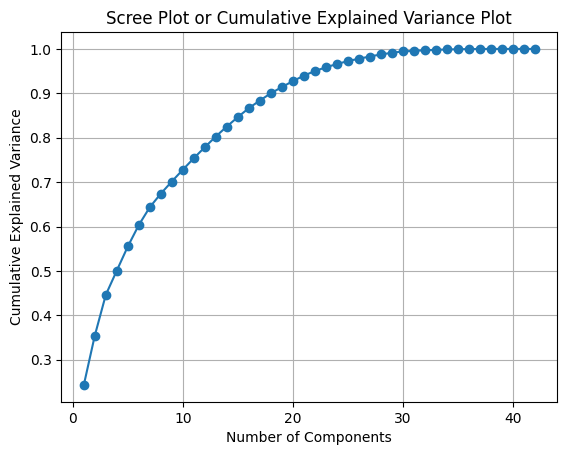

In [32]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [33]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 22


In [34]:
pc = PCA(n_components=22)
train_data_pc = pc.fit_transform(train_data_sc)
test_data_pc = pc.fit_transform(test_data_sc)

In [35]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.24325944 0.11127525 0.09171514 0.05461154 0.05423014 0.0482765
 0.04019353 0.0304749  0.02737052 0.02646809 0.02596659 0.02483316
 0.02407962 0.02245213 0.0212103  0.0201188  0.01717543 0.01634242
 0.01390772 0.01339356 0.01231609 0.01044885]


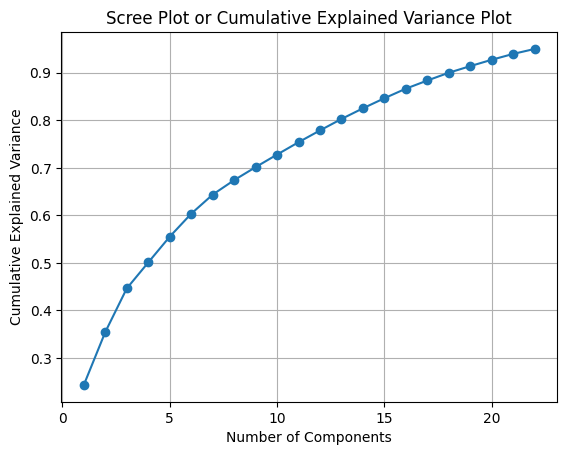

In [36]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# Model

## Decision Tree Algorithm

In [37]:
model_tree = DecisionTreeClassifier().fit(train_data_sc,train_label)

In [38]:
y_pred = model_tree.predict(test_data_sc)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [39]:
print("Accuracy SCore : ",accuracy_score(test_label,y_pred))

Accuracy SCore :  0.7781305814645763


In [40]:
confusion_matrix(test_label,y_pred)

array([[ 8272,   824,    70,     0,     0],
       [ 2559, 10685,    60,    59,    94],
       [  551,  1127,   646,    18,     0],
       [   22,   183,     8,     2,     0],
       [    4,     6,     5,     0,     0]], dtype=int64)

In [41]:
print(classification_report(test_label,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      9166
           1       0.83      0.79      0.81     13457
           2       0.82      0.28      0.41      2342
           3       0.03      0.01      0.01       215
           4       0.00      0.00      0.00        15

    accuracy                           0.78     25195
   macro avg       0.48      0.40      0.41     25195
weighted avg       0.79      0.78      0.77     25195



## K-Nearest Neighbors Algorithm

In [42]:
model_knn = KNeighborsClassifier().fit(train_data_sc,train_label)

In [43]:
y_pred_2 = model_knn.predict(test_data_sc)
y_pred_2

array([1, 1, 1, ..., 0, 0, 1])

In [44]:
print("Accuracy Score : ", accuracy_score(y_pred_2,test_label))

Accuracy Score :  0.8458027386386188


In [45]:
confusion_matrix(y_pred_2,test_label)

array([[ 8024,   381,  1077,     0,     1],
       [  766, 12938,   719,   203,    14],
       [  365,   136,   348,    12,     0],
       [   11,     0,   198,     0,     0],
       [    0,     2,     0,     0,     0]], dtype=int64)

In [46]:
print(classification_report(test_label,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      9166
           1       0.88      0.96      0.92     13457
           2       0.40      0.15      0.22      2342
           3       0.00      0.00      0.00       215
           4       0.00      0.00      0.00        15

    accuracy                           0.85     25195
   macro avg       0.43      0.40      0.40     25195
weighted avg       0.82      0.85      0.83     25195



## Artificial Neural Networks

In [47]:
train_data_pc.shape[1]

22

In [49]:
model_simple = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation="relu", input_shape=(train_data_pc.shape[1],)),
                                           tf.keras.layers.Dense(64, activation="relu"),
                                           tf.keras.layers.Dense(32, activation="relu"),
                                           tf.keras.layers.Dense(5,activation="softmax")])

In [52]:
model_simple.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [53]:
val_data = train_data_pc[:20000]
x_train = train_data_pc[20000:]
val_label = train_label[:20000]
y_label = train_label[20000:]

In [54]:
history = model_simple.fit(x_train,y_label,epochs=20,batch_size=128,validation_data=(val_data,val_label))

Epoch 1/20
632/632 [==============================] - 9s 9ms/step - loss: 0.0727 - acc: 0.9828 - val_loss: 0.0214 - val_acc: 0.9934
Epoch 2/20
632/632 [==============================] - 5s 8ms/step - loss: 0.0206 - acc: 0.9938 - val_loss: 0.0169 - val_acc: 0.9934
Epoch 3/20
632/632 [==============================] - 4s 7ms/step - loss: 0.0192 - acc: 0.9947 - val_loss: 0.0133 - val_acc: 0.9962
Epoch 4/20
632/632 [==============================] - 6s 9ms/step - loss: 0.0152 - acc: 0.9955 - val_loss: 0.0132 - val_acc: 0.9955
Epoch 5/20
632/632 [==============================] - 6s 9ms/step - loss: 0.0139 - acc: 0.9958 - val_loss: 0.0162 - val_acc: 0.9958
Epoch 6/20
632/632 [==============================] - 5s 9ms/step - loss: 0.0136 - acc: 0.9962 - val_loss: 0.0135 - val_acc: 0.9956
Epoch 7/20
632/632 [==============================] - 5s 7ms/step - loss: 0.0117 - acc: 0.9967 - val_loss: 0.0100 - val_acc: 0.9970
Epoch 8/20
632/632 [==============================] - 5s 7ms/step - loss: 0.

In [55]:
model_simple.evaluate(test_data_pc,test_label)

788/788 [==============================] - 1s 2ms/step - loss: 3.4984 - acc: 0.8206


[3.498370885848999, 0.8205993175506592]

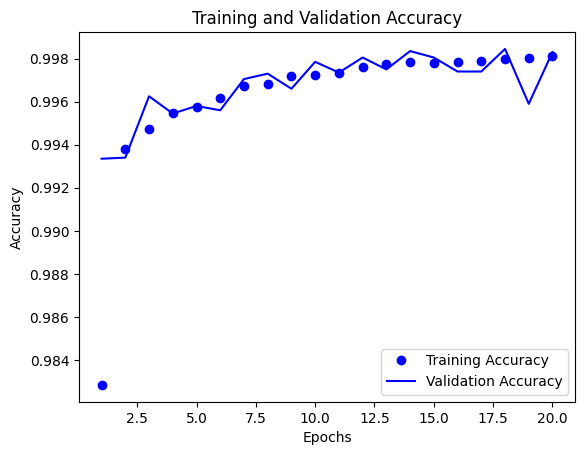

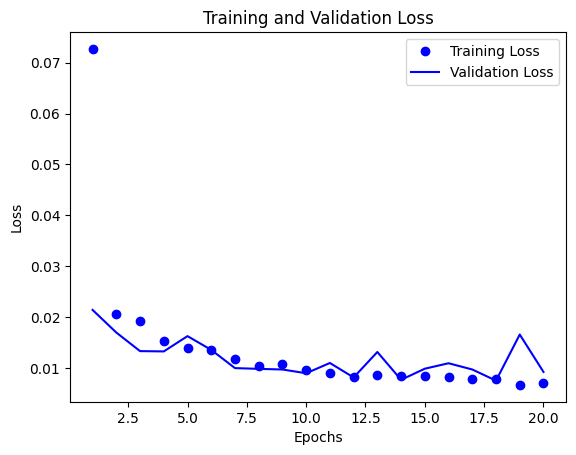

In [56]:
history_predict = history.history
Accuracy = history_predict["acc"]
Val_acc = history_predict["val_acc"]
Epochs = range(1,len(Accuracy)+1)

plt.plot(Epochs,Accuracy,"bo",label="Training Accuracy")
plt.plot(Epochs,Val_acc,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()
plt.clf()

history_predict = history.history
Loss = history_predict["loss"]
Val_loss = history_predict["val_loss"]
Epochs = range(1,len(Accuracy)+1)

plt.plot(Epochs,Loss,"bo",label="Training Loss")
plt.plot(Epochs,Val_loss,"b",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



## LSTM Model

In [66]:
model_lstm = tf.keras.models.Sequential([tf.keras.layers.Reshape((-1,1),input_shape=(train_data_pc.shape[1],)),
                                         tf.keras.layers.LSTM(32),
                                         tf.keras.layers.Dense(5,activation="softmax")])

In [67]:
model_lstm.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [68]:
history_2 = model_lstm.fit(x_train,y_label,epochs=20,batch_size=128,validation_data=(val_data,val_label))

Epoch 1/20
632/632 [==============================] - 12s 15ms/step - loss: 0.4178 - acc: 0.8466 - val_loss: 0.3166 - val_acc: 0.8734
Epoch 2/20
632/632 [==============================] - 8s 13ms/step - loss: 0.1591 - acc: 0.9454 - val_loss: 0.2103 - val_acc: 0.9221
Epoch 3/20
632/632 [==============================] - 9s 14ms/step - loss: 0.0966 - acc: 0.9665 - val_loss: 0.1574 - val_acc: 0.9521
Epoch 4/20
632/632 [==============================] - 9s 14ms/step - loss: 0.0619 - acc: 0.9808 - val_loss: 0.1744 - val_acc: 0.9114
Epoch 5/20
632/632 [==============================] - 9s 15ms/step - loss: 0.0485 - acc: 0.9849 - val_loss: 0.0399 - val_acc: 0.9883
Epoch 6/20
632/632 [==============================] - 10s 16ms/step - loss: 0.0412 - acc: 0.9868 - val_loss: 0.0411 - val_acc: 0.9870
Epoch 7/20
632/632 [==============================] - 11s 17ms/step - loss: 0.0365 - acc: 0.9881 - val_loss: 0.0325 - val_acc: 0.9894
Epoch 8/20
632/632 [==============================] - 10s 16ms/ste

In [69]:
model_lstm.evaluate(test_data_pc,test_label)

788/788 [==============================] - 4s 5ms/step - loss: 1.0112 - acc: 0.7956


[1.0112088918685913, 0.7955546975135803]

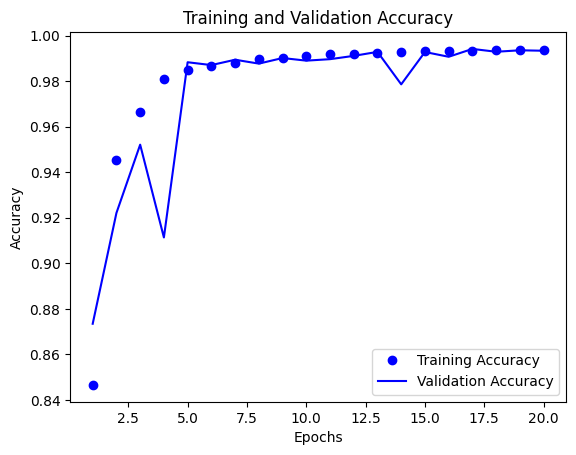

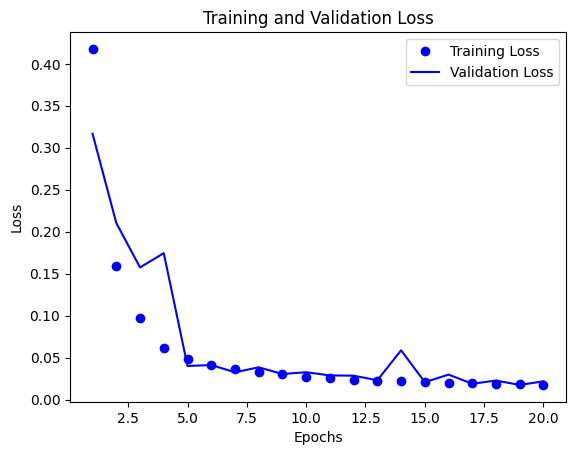

In [70]:
history_predict = history_2.history
Accuracy = history_predict["acc"]
Val_acc = history_predict["val_acc"]
Epochs = range(1,len(Accuracy)+1)

plt.plot(Epochs,Accuracy,"bo",label="Training Accuracy")
plt.plot(Epochs,Val_acc,"b",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()
plt.clf()

history_predict = history_2.history
Loss = history_predict["loss"]
Val_loss = history_predict["val_loss"]
Epochs = range(1,len(Accuracy)+1)

plt.plot(Epochs,Loss,"bo",label="Training Loss")
plt.plot(Epochs,Val_loss,"b",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



## KMean Clustering

In [58]:
wscc = []
for i in range(1,11):
  model = KMeans(n_clusters=i,init="k-means++",random_state=0)
  model.fit(train_data_pc)
  wscc.append(model.inertia_)

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

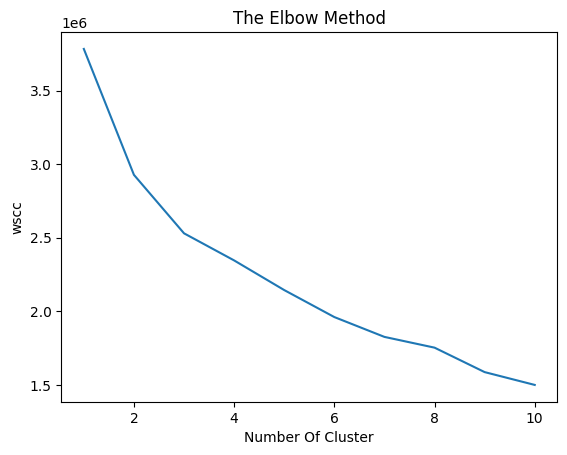

In [59]:
plt.plot(range(1,11),wscc)
plt.title("The Elbow Method")
plt.xlabel("Number Of Cluster")
plt.ylabel("wscc")
plt.show()

In [60]:
train_data_pc.shape

(100778, 22)

In [62]:
model_km = KMeans(n_clusters=6,random_state=0).fit(train_data_pc)

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
y_cluster = model_km.predict(train_data_pc)

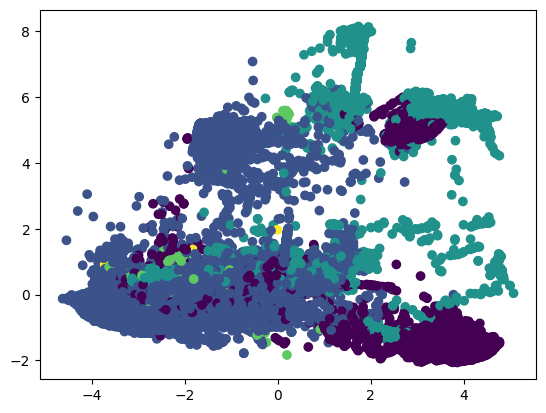

In [65]:
plt.scatter(train_data_pc[:,0],train_data_pc[:,1],c=train_label)

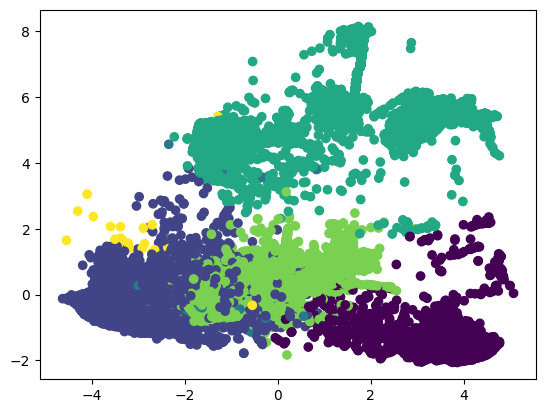

In [64]:
plt.scatter(train_data_pc[:,0],train_data_pc[:,1],c=y_cluster)